In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
import zipfile,os
import shutil

Mounted at /content/drive


In [ ]:
# ekstraksi file zip
local_zip = '/content/drive/My Drive/google_colab/dataset/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/google_colab/dataset/')
zip_ref.close()

In [2]:
def create_dir(path):
  if os.path.exists(path):
    shutil.rmtree(path)
    os.mkdir(path)
    return path
  else:
    os.mkdir(path)
    return path

In [3]:
base_dir = '/content/drive/My Drive/google_colab/dataset/rockpaperscissors'

In [ ]:
# membuat direktori training dan validation
train_dir = create_dir(os.path.join(base_dir, 'train'))
validation_dir = create_dir(os.path.join(base_dir, 'val'))

rock_training_dir = create_dir(os.path.join(train_dir, 'rock'))
paper_training_dir = create_dir(os.path.join(train_dir, 'paper'))
scissors_training_dir = create_dir(os.path.join(train_dir, 'scissors'))

rock_validation_dir = create_dir(os.path.join(validation_dir, 'rock'))
paper_validation_dir = create_dir(os.path.join(validation_dir, 'paper'))
scissors_validation_dir = create_dir(os.path.join(validation_dir, 'scissors'))

In [4]:
os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/train')

['rock', 'paper', 'scissors']

In [5]:
os.listdir('/content/drive/My Drive/google_colab/dataset/image_datasets/val')

['paper', 'rock', 'scissors']

In [6]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

print(len(os.listdir(rock_dir)))
print(len(os.listdir(paper_dir)))
print(len(os.listdir(scissors_dir)))

726
712
750


In [7]:
from PIL import Image
import random
from shutil import copyfile

def split_dataset(source_dir='', training_dir='', validation_dir=''):
  data = os.listdir(source_dir)
  random_data = random.sample(data, len(data))

  # 0.6 = size for data training
  train_size = len(data)*0.6
  for i, filename in enumerate(random_data):
    filepath = os.path.join(source_dir, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(training_dir, filename))
      else :
        copyfile(filepath, os.path.join(validation_dir, filename))

In [ ]:
# Splitting Dataset
split_dataset(rock_dir, rock_training_dir, rock_validation_dir)
split_dataset(paper_dir, paper_training_dir, paper_validation_dir)
split_dataset(scissors_dir, scissors_training_dir, scissors_validation_dir)

In [8]:
print('Total Data Training')
data_rock_train = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/train/rock'))
data_paper_train = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/train/paper'))
data_scissors_train = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/train/scissors'))
print(data_rock_train + data_paper_train + data_scissors_train)
print('Total Data Validation')
data_rock_validation = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/val/rock'))
data_paper_validation = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/val/paper'))
data_scissors_validation = len(os.listdir('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/val/scissors'))
print(data_rock_validation + data_paper_validation + data_scissors_validation)

Total Data Training
1314
Total Data Validation
874


# **IMAGE PREPROCESSING**

In [9]:
# Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

In [10]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Image Data Generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode = 'categorical',
    color_mode='rgb'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode = 'categorical',
    color_mode='rgb'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **MODEL**

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm

# create model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(123, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3))
model.add(Activation('sigmoid'))


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       2

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(0.0001),
              metrics=['accuracy'])

### **TRAIN MODEL**

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)

Epoch 1/30
42/42 - 509s - loss: 0.9446 - accuracy: 0.5700 - val_loss: 1.0713 - val_accuracy: 0.6934
Epoch 2/30
42/42 - 16s - loss: 0.6618 - accuracy: 0.7732 - val_loss: 1.0329 - val_accuracy: 0.8284
Epoch 3/30
42/42 - 16s - loss: 0.5241 - accuracy: 0.8349 - val_loss: 1.0212 - val_accuracy: 0.4817
Epoch 4/30
42/42 - 16s - loss: 0.4399 - accuracy: 0.8744 - val_loss: 0.9732 - val_accuracy: 0.6087
Epoch 5/30
42/42 - 16s - loss: 0.3596 - accuracy: 0.9033 - val_loss: 0.9398 - val_accuracy: 0.5309
Epoch 6/30
42/42 - 16s - loss: 0.3125 - accuracy: 0.9155 - val_loss: 0.8071 - val_accuracy: 0.9359
Epoch 7/30
42/42 - 16s - loss: 0.2510 - accuracy: 0.9437 - val_loss: 0.7603 - val_accuracy: 0.8696
Epoch 8/30
42/42 - 16s - loss: 0.2399 - accuracy: 0.9460 - val_loss: 0.6179 - val_accuracy: 0.9314
Epoch 9/30
42/42 - 16s - loss: 0.2124 - accuracy: 0.9460 - val_loss: 1.0513 - val_accuracy: 0.3467
Epoch 10/30
42/42 - 16s - loss: 0.1926 - accuracy: 0.9505 - val_loss: 0.6196 - val_accuracy: 0.7140
Epoch 11

In [15]:
model_score = model.evaluate_generator(train_generator,steps=10)
print("Model Test Loss:",model_score[0]*100)
print("Model Test Accuracy:",model_score[1]*100)

Instructions for updating:
Please use Model.evaluate, which supports generators.
Model Test Loss: 2.240058407187462
Model Test Accuracy: 99.37499761581421


In [16]:
# save weight
model_base_path = '/content/drive/My Drive/google_colab/dataset/rockpaperscissors/'
model_name = 'rockpaperscissors_model_masum.h5'
model_path = os.path.join(model_base_path, model_name)

print('Saving Model At {}...'.format(model_path))
model.save_weights(model_path)

Saving Model At /content/drive/My Drive/google_colab/dataset/rockpaperscissors/rockpaperscissors_model_masum.h5...


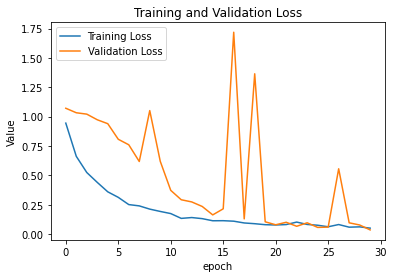

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

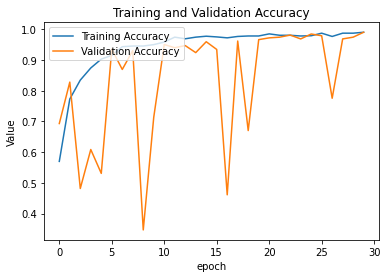

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

Saving 93858.jpg to 93858.jpg
[[0. 1. 1.]]
93858.jpg
rock


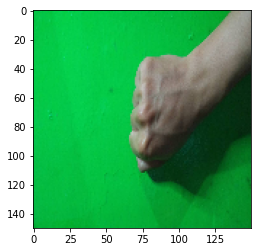

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.models import load_model

uploaded = files.upload()

model.load_weights('/content/drive/My Drive/google_colab/dataset/rockpaperscissors/rockpaperscissors_model_masum.h5')  

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes)

  print(fn)
  if classes[0][0]==1 and classes[0][1]==0 and classes[0][2]==0:
    print('paper')
  elif classes[0][1]==1 or (classes[0][0]==1 and classes[0][1]==1) :
    print('rock')
  else:
    print('scissors')

# **BIODATA**

BIODATA MA'SUM
Nama  : Ma'sum Abdul Matin
email : child.masum@gmail.com
no.hp : +6282219366398



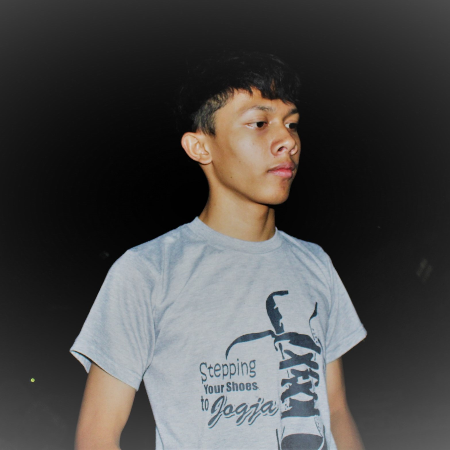

In [30]:
from google.colab.patches import cv2_imshow
import cv2

img_me = cv2.imread('/content/drive/My Drive/google_colab/image/me.JPG')
img_me = cv2.resize(img_me, (450, 450))
my_biodata = """Nama  : Ma'sum Abdul Matin
email : child.masum@gmail.com
no.hp : +6282219366398
"""
print("BIODATA MA\'SUM")
print(my_biodata)
cv2_imshow(img_me)